In [1]:
# standard modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.patches as patches
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy import stats
pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns',999)

# pmagpy
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import cartopy.crs as ccrs
import cartopy
import xml.etree.ElementTree as ET
import pygplates as pgp

from paleogeo_functions import *

In [214]:
India_color = '#f5c10e'
Rayner_color = '#ffe27e'
SChina_color = '#2ecc71'

Laurentia_color = '#E3735E'
Scotland_color = 'lightgreen'
Baltica_color = 'green'

Australia_color = '#9E7BB5'
Antarctica_color = '#E39FF6'
Zealandia_color = '#9867C5'

Siberia_color = 'grey'

NorthChina_color = 'darkkhaki'
Tarim_color = 'palegoldenrod'

Kalahari_color = 'orange'

Amazonia_color = '#4372AA'
Arequipa_color = 'lightblue'
etcetera_color = '#b2b3b2'

lat_grid = [-80,-60,-30,0,30,60,80]
lon_grid = np.arange(-180,180+60,60)

Origin of shapes used in shapes_cratons.gpml
- Siberia (401) is the 401 Siberia of Torsvik and Cocks trimmed to match the extent of craton used in Merdith et al. 2021
- Siberia (404) is the Aldan of Torsvik and Cocks trimmed to not have extra part of Anabar

In [226]:
Laur_Parauto_Euler = [71.87,97.94,-2.0] #Torsvik and Cocks (2017)
Greenland_Laur_Euler = [67.5,-118.5,-13.8] #Roest and Srivastava (1989)
Svalbard_Laur_Euler = [-81.0,125.0,68.0]
Scotland_Laur_Euler = [78.64,161.9,-32.0]

Siberia_Laur_Euler = [77.0,98.0,137.0] #Long-lived, tight fit proposed in Evans et al. 2016
Viljay_Rift_Euler = [60.0,100.0,14.0] #Aldan (404) to Anabar (401) rotation of Torsvik and Cocks 2017

NChina_Laur_Euler = [52.9462,27.2366,61.9218] #adjusted from Ding et al. 2021 which is too tight and overlaps with Laurentia
#NChina_Laur_Euler = [58,30,68] #Ding et al. 2021

Tarim_Laur_Euler = [74,340,124] #Ding et al. 2021 modification of Wen model

SAus_Laur_Euler = [-35.4124,-32.1725,-128.5807]
NAus_SAus_Euler = [-20.0,135.0,-40.0]
Antarctica_SAus_Euler = [-3.91,37.9,30.86]

Zealandia_Laur_Euler = [22.1,151.6,116.6]

#Baltica_Laur_Euler = [75.8,-95.8,-59.2] #version currently in our Rodinia model
Baltica_Laur_Euler = [81,250,-50] #Cawood et al 2010

#Amazonia_Laur_Euler = [13.4,-49.5,-108.4]
Amazonia_Laur_Euler = [-12,133,111]
RDLP_Amazonia_Euler = [0.67,103.22,-30.82]
Parana_Amazonia_Euler = [0.67,103.22,-30.82]

Arequipa_Laur_Euler = [11.3654,-72.6782,-130.2746]
Cuyania_Laur_Euler = [-3.1,116.1,136.4]

#Kalahari_Laur_Euler = [15.102,-25.2783,-157.5464] #Tight in Rodinia model
Kalahari_Laur_Euler = [14.7,-24.2,-152.5] #allows space for Arequipa ribbon continent

India_Euler_755 = [65.4126,103.9231,-29.3572]
SChina_India_Euler = [6.7224,77.6921,67.9571]
Rayner_India_Euler = [1.8434,-165.1696,-91.8395]

In [227]:
Laur_Euler_1050 = [-40.3,-22.4,190.4]

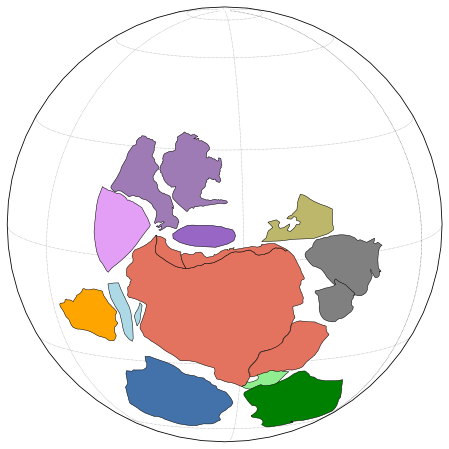

In [235]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=115, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)
# ax = ipmag.make_mollweide_map(add_land=False, central_longitude=150,
#                                  figsize=(8,8), grid_lines=False)

cratons_lw = 0.5
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_1050],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [153], [Laur_Euler_1050],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [162], [Laur_Euler_1050],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_1050],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Scotland
craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler_1050],
            'k', Scotland_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Siberia
craton_plot(ax, [401], [Siberia_Laur_Euler, Laur_Euler_1050],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [404], [Viljay_Rift_Euler, Siberia_Laur_Euler, Laur_Euler_1050],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Baltica
craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler_1050],
            'k', Baltica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Amazonia
craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler_1050],
            'k', Amazonia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#Arequipa
craton_plot(ax, [20110], [Arequipa_Laur_Euler, Laur_Euler_1050],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Cuyania
craton_plot(ax, [2901], [Cuyania_Laur_Euler, Laur_Euler_1050],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Kalahari
craton_plot(ax, [7011], [Kalahari_Laur_Euler, Laur_Euler_1050],
            'k', Kalahari_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#North China
# craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_1050],
#             'k', NorthChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_1050],
            'k', NorthChina_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml', reverse_draw=True)

# #Tarim
# craton_plot(ax, [480], [Tarim_Laur_Euler, Laur_Euler_1050],
#             'k', Tarim_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml')


# Australia
craton_plot(ax, [801], [SAus_Laur_Euler, Laur_Euler_1050],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
craton_plot(ax, [8011], [NAus_SAus_Euler, SAus_Laur_Euler, Laur_Euler_1050],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
# Zealandia
craton_plot(ax, [8060], [Zealandia_Laur_Euler, Laur_Euler_1050],
            'k', Zealandia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

# Antarctica
craton_plot(ax, [802], [Antarctica_SAus_Euler, SAus_Laur_Euler, Laur_Euler_1050],
            'k', Antarctica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)


plt.savefig('reconstructions/Laurentia_1050.pdf')
plt.show()

In [229]:
Laur_Euler_775 = [-45.7737,-16.92,147.9515]

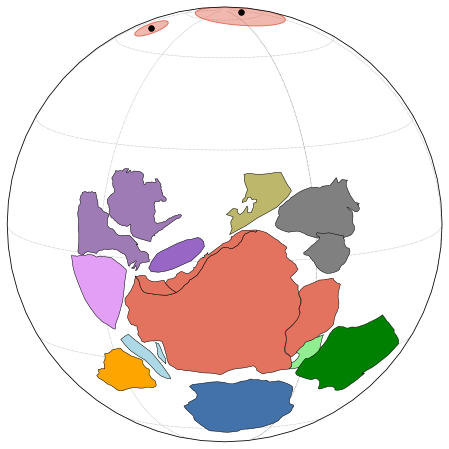

In [236]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=155, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)
# ax = ipmag.make_mollweide_map(add_land=False, central_longitude=150,
#                                  figsize=(8,8), grid_lines=False)

cratons_lw = 0.5
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_775],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [153], [Laur_Euler_775],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [162], [Laur_Euler_775],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_775],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Scotland
craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler_775],
            'k', Scotland_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Siberia
craton_plot(ax, [401], [Siberia_Laur_Euler, Laur_Euler_775],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [404], [Viljay_Rift_Euler, Siberia_Laur_Euler, Laur_Euler_775],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Baltica
craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler_775],
            'k', Baltica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Amazonia
craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler_775],
            'k', Amazonia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#Arequipa
craton_plot(ax, [20110], [Arequipa_Laur_Euler, Laur_Euler_775],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Cuyania
craton_plot(ax, [2901], [Cuyania_Laur_Euler, Laur_Euler_775],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Kalahari
craton_plot(ax, [7011], [Kalahari_Laur_Euler, Laur_Euler_775],
            'k', Kalahari_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#North China
# craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_775],
#             'k', NorthChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_775],
            'k', NorthChina_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml', reverse_draw=True)

# #Tarim
# craton_plot(ax, [480], [Tarim_Laur_Euler, Laur_Euler_775],
#             'k', Tarim_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml')


# Australia
craton_plot(ax, [801], [SAus_Laur_Euler, Laur_Euler_775],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
craton_plot(ax, [8011], [NAus_SAus_Euler, SAus_Laur_Euler, Laur_Euler_775],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
# Zealandia
craton_plot(ax, [8060], [Zealandia_Laur_Euler, Laur_Euler_775],
            'k', Zealandia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

# Antarctica
craton_plot(ax, [802], [Antarctica_SAus_Euler, SAus_Laur_Euler, Laur_Euler_775],
            'k', Antarctica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#Gunbarrel
rotated_pole_plot(ax, 138.2, 9.1, 12.0,
                  [Laur_Euler_775],
                  'o', 30, 'k', Laurentia_color, 0.5)
#Uinta Mtn
rotated_pole_plot(ax, 161.3, 0.8, 4.7,
                  [Laur_Euler_775],
                  'o', 30, 'k', Laurentia_color, 0.5)
plt.savefig('reconstructions/Laurentia_775.pdf')
plt.show()

In [250]:
Laur_Euler_720 = [-47.1,-2.2,156.4]
Kalahari_Laur_Euler = [14.4,-23.6,-149.6]
SAus_Laur_Euler = [-31.5,-26.65,-127.5]

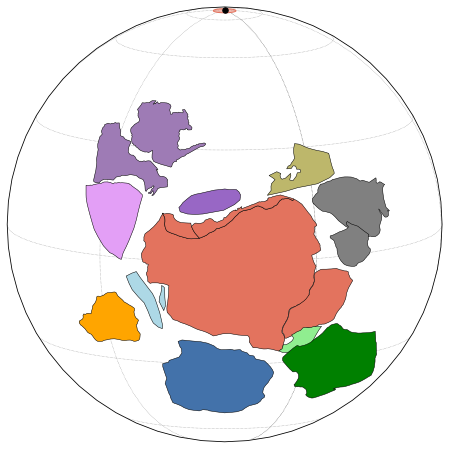

In [251]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=155, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)
# ax = ipmag.make_mollweide_map(add_land=False, central_longitude=150,
#                                  figsize=(8,8), grid_lines=False)

cratons_lw = 0.5
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [153], [Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [162], [Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Scotland
craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler_720],
            'k', Scotland_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Siberia
craton_plot(ax, [401], [Siberia_Laur_Euler, Laur_Euler_720],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [404], [Viljay_Rift_Euler, Siberia_Laur_Euler, Laur_Euler_720],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Baltica
craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler_720],
            'k', Baltica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Amazonia
craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler_720],
            'k', Amazonia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#Arequipa
craton_plot(ax, [20110], [Arequipa_Laur_Euler, Laur_Euler_720],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Cuyania
craton_plot(ax, [2901], [Cuyania_Laur_Euler, Laur_Euler_720],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Kalahari
craton_plot(ax, [7011], [Kalahari_Laur_Euler, Laur_Euler_720],
            'k', Kalahari_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#North China
# craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_720],
#             'k', NorthChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_720],
            'k', NorthChina_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml', reverse_draw=True)

# #Tarim
# craton_plot(ax, [480], [Tarim_Laur_Euler, Laur_Euler_720],
#             'k', Tarim_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml')


# Australia
craton_plot(ax, [801], [SAus_Laur_Euler, Laur_Euler_720],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
craton_plot(ax, [8011], [NAus_SAus_Euler, SAus_Laur_Euler, Laur_Euler_720],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
# Zealandia
craton_plot(ax, [8060], [Zealandia_Laur_Euler, Laur_Euler_720],
            'k', Zealandia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

# Antarctica
craton_plot(ax, [802], [Antarctica_SAus_Euler, SAus_Laur_Euler, Laur_Euler_720],
            'k', Antarctica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#Franklin LIP
rotated_pole_plot(ax, 162.1, 6.7, 3.0,
                  [Laur_Euler_720],
                  'o', 30, 'k', Laurentia_color, 0.5)
plt.savefig('reconstructions/Laurentia_720.pdf')
plt.show()

In [240]:
Laur_Euler_610 = [34.1,-165.2,-157.2]

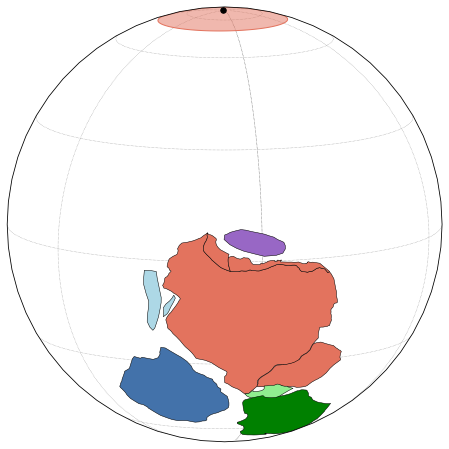

In [244]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=170, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)
# ax = ipmag.make_mollweide_map(add_land=False, central_longitude=150,
#                                  figsize=(8,8), grid_lines=False)

cratons_lw = 0.5
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_610],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [153], [Laur_Euler_610],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [162], [Laur_Euler_610],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_610],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Scotland
craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler_610],
            'k', Scotland_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Baltica
craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler_610],
            'k', Baltica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Amazonia
craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler_610],
            'k', Amazonia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#Arequipa
craton_plot(ax, [20110], [Arequipa_Laur_Euler, Laur_Euler_610],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Cuyania
craton_plot(ax, [2901], [Cuyania_Laur_Euler, Laur_Euler_610],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Zealandia
craton_plot(ax, [8060], [Zealandia_Laur_Euler, Laur_Euler_610],
            'k', Zealandia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#Gunbarrel
rotated_pole_plot(ax, 175.29, -19.0, 17.4,
                  [Laur_Euler_610],
                  'o', 30, 'k', Laurentia_color, 0.5)

plt.savefig('reconstructions/Laurentia_610.pdf')
plt.show()

In [246]:
Laur_Euler_550 = [36.7,-155.7,-143.6]

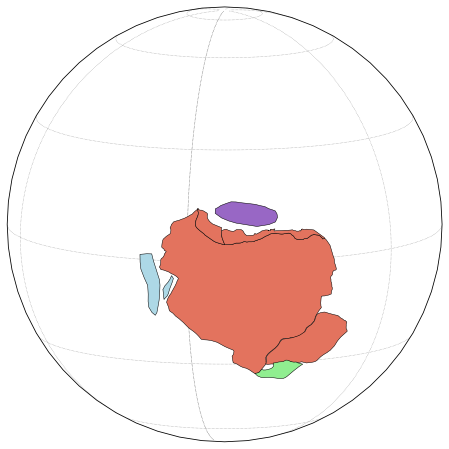

In [249]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=190, central_latitude=10,
                                 figsize=(8,8), grid_lines=False)
# ax = ipmag.make_mollweide_map(add_land=False, central_longitude=150,
#                                  figsize=(8,8), grid_lines=False)

cratons_lw = 0.5
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_550],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [153], [Laur_Euler_550],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [162], [Laur_Euler_550],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_550],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Scotland
craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler_550],
            'k', Scotland_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Arequipa
craton_plot(ax, [20110], [Arequipa_Laur_Euler, Laur_Euler_550],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Cuyania
craton_plot(ax, [2901], [Cuyania_Laur_Euler, Laur_Euler_550],
            'k', Arequipa_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Zealandia
craton_plot(ax, [8060], [Zealandia_Laur_Euler, Laur_Euler_550],
            'k', Zealandia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

plt.savefig('reconstructions/Laurentia_550.pdf')
plt.show()

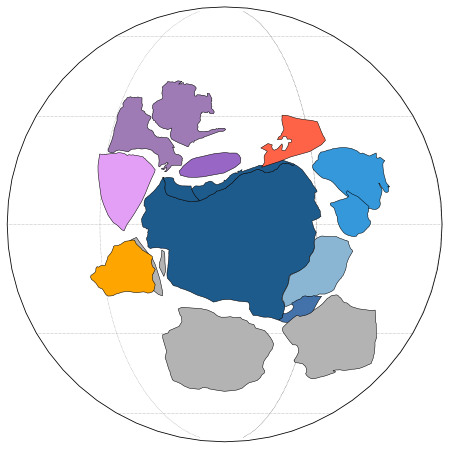

In [166]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=155, central_latitude=0,
                                 figsize=(8,8), grid_lines=False)
# ax = ipmag.make_mollweide_map(add_land=False, central_longitude=150,
#                                  figsize=(8,8), grid_lines=False)

cratons_lw = 0.5
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [153], [Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [162], [Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_720],
            'k', Svalbard_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Scotland
craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler_720],
            'k', Scotland_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Siberia
craton_plot(ax, [401], [Siberia_Laur_Euler, Laur_Euler_755],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [404], [Viljay_Rift_Euler, Siberia_Laur_Euler, Laur_Euler_755],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Baltica
craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler_720],
            'k', etcetera_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Amazonia
craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler_720],
            'k', etcetera_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#Arequipa
craton_plot(ax, [20110], [Arequipa_Laur_Euler, Laur_Euler_720],
            'k', etcetera_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Cuyania
craton_plot(ax, [2901], [Cuyania_Laur_Euler, Laur_Euler_720],
            'k', etcetera_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Kalahari
craton_plot(ax, [7011], [Kalahari_Laur_Euler, Laur_Euler_720],
            'k', Kalahari_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)

#North China
# craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_720],
#             'k', NorthChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_720],
            'k', NorthChina_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml', reverse_draw=True)

# #Tarim
# craton_plot(ax, [480], [Tarim_Laur_Euler, Laur_Euler_720],
#             'k', Tarim_color, cratons_alpha, 0.5, gpml='shapes_cratons.gpml')


# Australia
craton_plot(ax, [801], [SAus_Laur_Euler, Laur_Euler_720],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
craton_plot(ax, [8011], [NAus_SAus_Euler, SAus_Laur_Euler, Laur_Euler_720],
            'k', Australia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=True)
# Zealandia
craton_plot(ax, [8060], [Zealandia_Laur_Euler, Laur_Euler_720],
            'k', Zealandia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml', reverse_draw=False)

# Antarctica
craton_plot(ax, [802], [Antarctica_SAus_Euler, SAus_Laur_Euler, Laur_Euler_720],
            'k', Antarctica_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

plt.show()

In [163]:
Laur_Euler_650 = [38.50,-170.64,-157.43]

Siberia_Laur_650 = [64.03,106.44,114.37]

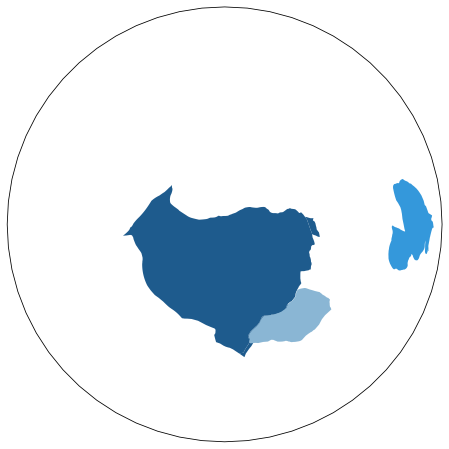

In [125]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=170, central_latitude=0,
                                 figsize=(8,8), grid_lines=False)

cratons_lw = 0.0
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_650],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_650],
            'k', Svalbard_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

# Siberia
craton_plot(ax, [401], [Siberia_Laur_650, Laur_Euler_650],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [404], [Viljay_Rift_Euler, Siberia_Laur_650, Laur_Euler_650],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

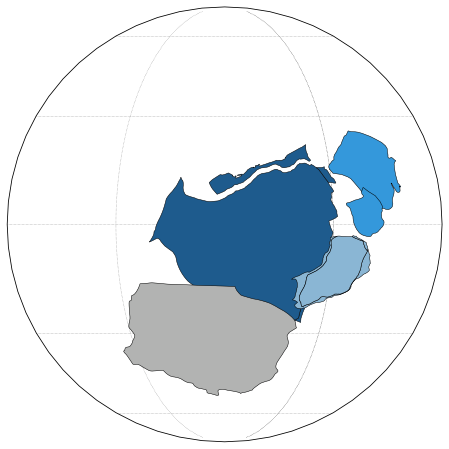

In [37]:
ax = ipmag.make_orthographic_map(add_land=False, central_longitude=150, central_latitude=0,
                                 figsize=(8,8), grid_lines=False)

cratons_lw = 0.5
cratons_alpha = 1.0

# Laurentia
craton_plot(ax, [101], [Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

craton_plot(ax, [162], [Laur_Parauto_Euler, Laur_Euler_720],
            'k', Laurentia_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# Greenland
craton_plot(ax, [102], [Greenland_Laur_Euler, Laur_Euler_720],
            'k', Svalbard_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# Siberia
craton_plot(ax, [401], [Siberia_Laur_Euler, Laur_Euler_755],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')
craton_plot(ax, [404], [Viljay_Rift_Euler, Siberia_Laur_Euler, Laur_Euler_755],
            'k', Siberia_color, cratons_alpha, cratons_lw, gpml='shapes_cratons.gpml')

#Amazonia
craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler_720],
            'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# # Svalbard
# craton_plot(ax, [311], [Svalbard_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', Svalbard_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# # Australia
# craton_plot(ax, [801], [SAus_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', Australia_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml', reverse_draw=True)
# craton_plot(ax, [8011], [NAus_SAus_Euler, SAus_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', Australia_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml', reverse_draw=True)

# # Antarctica
# craton_plot(ax, [802], [Antarctica_SAus_Euler, SAus_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', Antarctica_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# # India
# craton_plot(ax, [501], [India_Euler_755, TPW_Euler_755],
#             'k', India_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# # Rayner
# craton_plot(ax, [803], [Rayner_India_Euler, India_Euler_755, TPW_Euler_755],
#             'k', Rayner_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')



# # South China
# craton_plot(ax, [6024], [SChina_India_Euler, India_Euler_755, TPW_Euler_755],
#             'k', SChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
# craton_plot(ax, [6023], [SChina_India_Euler, India_Euler_755, TPW_Euler_755],
#             'k', SChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
# craton_plot(ax, [602], [SChina_India_Euler, India_Euler_755, TPW_Euler_755],
#             'k', SChina_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')

# # etcetera blocks
# craton_plot(ax, [303], [Scotland_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
# craton_plot(ax, [201], [Amazonia_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml', reverse_draw=True)
# craton_plot(ax, [202], [Parana_Amazonia_Euler, Amazonia_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
# craton_plot(ax, [203], [RDLP_Amazonia_Euler, Amazonia_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml')
# craton_plot(ax, [302], [Baltica_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml', reverse_draw=True)
# craton_plot(ax, [601], [NChina_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml', reverse_draw=True)
# craton_plot(ax, [7011], [Kalahari_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#             'k', etcetera_color, cratons_alpha, cratons_lw, gpml='CEED6-modified.gpml', reverse_draw=True)

# ### POLES

# poles_alpha = 0.5
# poles_markersize = 70

# # Australia
# df_slice = Australia[Australia['name']=='Mundine Well Dykes Combined']
# pole_color = color_mapping.to_rgba([df_slice['age'].iloc[0]]).tolist()
# rotated_pole_plot(ax, df_slice['plon'].iloc[0], df_slice['plat'].iloc[0], df_slice['a95'].iloc[0],
#                   [SAus_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#                   'o', poles_markersize, pole_color, Australia_color, poles_alpha)

# # India
# df_slice = India[India['name']=='Malani Igneous Suite -Comb']
# pole_color = color_mapping.to_rgba([df_slice['age'].iloc[0]]).tolist()
# rotated_pole_plot(ax, df_slice['plon'].iloc[0], df_slice['plat'].iloc[0], df_slice['a95'].iloc[0],
#                   [India_Euler_755, TPW_Euler_755],
#                   'o', poles_markersize, pole_color, India_color, poles_alpha)

# # Siberia
# df_slice = Siberia[Siberia['name']=='Kitoi Cryogenian dykes']
# pole_color = color_mapping.to_rgba([df_slice['age'].iloc[0]]).tolist()
# rotated_pole_plot(ax, df_slice['plon'].iloc[0], df_slice['plat'].iloc[0], df_slice['a95'].iloc[0],
#                   [Siberia_Laur_Euler, Laur_Euler_755, TPW_Euler_755],
#                   'o', poles_markersize, pole_color, Siberia_color, poles_alpha)

# # Laurentia
# df_slice = Laurentia[Laurentia['name']=='Carbon Canyon']
# pole_color = color_mapping.to_rgba([df_slice['age'].iloc[0]]).tolist()
# rotated_pole_plot(ax, df_slice['plon'].iloc[0], df_slice['plat'].iloc[0], df_slice['a95'].iloc[0],
#                   [Laur_Euler_755, TPW_Euler_755],
#                   'o', poles_markersize, pole_color, Laurentia_color, poles_alpha)

# # South China
# df_slice = SChina_site_06[SChina_site_06['name']=='Liantuo Formation - Jing et al. (2021) site mean (f=0.6)']
# pole_color = color_mapping.to_rgba([df_slice['age'].iloc[0]]).tolist()
# rotated_pole_plot(ax, df_slice['plon'].iloc[0], df_slice['plat'].iloc[0], df_slice['a95'].iloc[0],
#                   [SChina_India_Euler, India_Euler_755, TPW_Euler_755],
#                   'o', poles_markersize, pole_color, SChina_color, poles_alpha)
# df_slice = SChina_site_06[SChina_site_06['name']=='Liantuo Formation - site mean (f=0.6)']
# pole_color = color_mapping.to_rgba([df_slice['age'].iloc[0]]).tolist()
# rotated_pole_plot(ax, df_slice['plon'].iloc[0], df_slice['plat'].iloc[0], df_slice['a95'].iloc[0],
#                   [SChina_India_Euler, India_Euler_755, TPW_Euler_755],
#                   'o', poles_markersize, pole_color, SChina_color, poles_alpha)

ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=0.5,
             color='C7', linestyle='dotted', zorder=-1)

#plt.savefig('../Output/TPW_model_755.pdf', bbox_inches='tight')
plt.show()